In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('CarFuel_Dataset_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

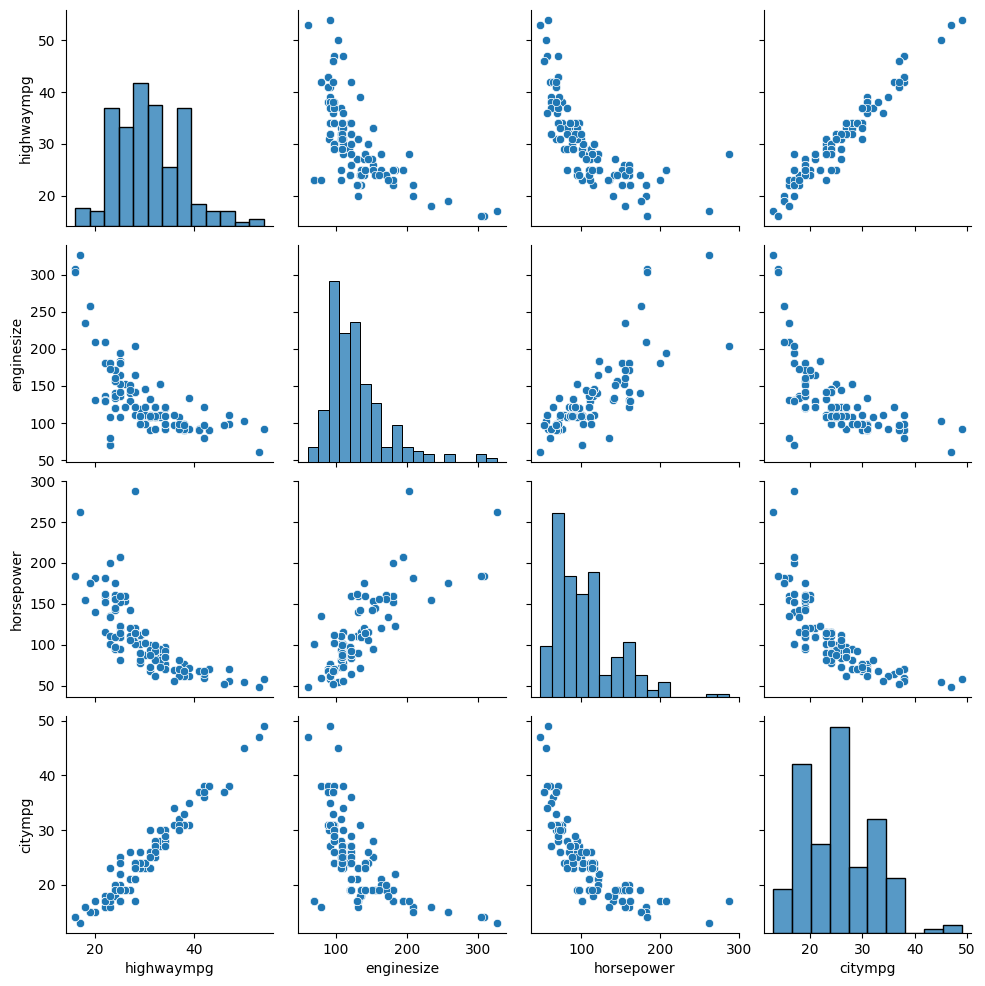

In [4]:
sns.pairplot(df[['highwaympg', 'enginesize', 'horsepower', 'citympg']])
plt.show()

In [5]:
drop_useless = ['car_ID', 'symboling', 'CarName', 'doornumber', 'carbody', 'enginelocation', 
                 'fuelsystem', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'stroke', 
                 'compressionratio', 'boreratio', 'price']
df = df.drop(columns=drop_useless)

print("Remaining Features After Cleaning:\n", df.columns.tolist())

Remaining Features After Cleaning:
 ['fueltype', 'aspiration', 'drivewheel', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns)

X = df.drop(columns=['highwaympg'])
y = df['highwaympg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Decision Tree Regressor Model
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dtree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Parameters from GridSearchCV:\n", grid_search.best_params_)

predictions = best_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Best Parameters from GridSearchCV:
 {'max_depth': None, 'min_samples_split': 2}
Mean Absolute Error: 0.8292682926829268
Mean Squared Error: 5.219512195121951
R2 Score: 0.9261609412081531


In [8]:
#Random Forest Regressor Model
import joblib

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(X_train[:10])

print("Best Parameters from GridSearchCV:\n", grid_search.best_params_)
predictions = best_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

joblib.dump(best_model, open('fuelconsumption.pkl', 'wb'))

     curbweight  enginesize  horsepower  peakrpm  citympg  fueltype_diesel  \
66         2700         134          72     4200       31             True   
111        3075         120          95     5000       19            False   
153        2280          92          62     4800       31            False   
96         1971          97          69     5200       31            False   
38         2289         110          86     5800       27            False   
24         1967          90          68     5500       31            False   
139        2120         108          73     4400       26            False   
112        3252         152          95     4150       28             True   
29         2811         156         145     5000       19            False   
19         1874          90          70     5400       38            False   

     fueltype_gas  aspiration_std  aspiration_turbo  drivewheel_4wd  ...  \
66          False            True             False           Fal

In [9]:
#Gradient Boosting Regressor Model
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gbr = GradientBoostingRegressor(random_state=42)
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='r2')
grid_search_gbr.fit(X_train, y_train)
best_gbr_model = grid_search_gbr.best_estimator_

print("Best Parameters from GridSearchCV for GBR:\n", grid_search_gbr.best_params_)

predictions_gbr = best_gbr_model.predict(X_test)
mae_gbr = mean_absolute_error(y_test, predictions_gbr)
mse_gbr = mean_squared_error(y_test, predictions_gbr)
r2_gbr = r2_score(y_test, predictions_gbr)

print(f"Gradient Boosting Regressor Performance:")
print(f"Mean Absolute Error: {mae_gbr}")
print(f"Mean Squared Error: {mse_gbr}")
print(f"R2 Score: {r2_gbr}")

Best Parameters from GridSearchCV for GBR:
 {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Gradient Boosting Regressor Performance:
Mean Absolute Error: 0.8088044928222007
Mean Squared Error: 5.066209329819494
R2 Score: 0.9283296763046255
